In [2]:
# Importar librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import re
import string

# Importar la clase del paquete (ahora debería funcionar)
from sentiment_analysis_spanish.sentiment_analysis import SentimentAnalysisSpanish


In [4]:
# Función para limpiar el tweet
def limpiar_tweet(tweet):
    tweet = tweet.lower()  # Convertir a minúsculas
    tweet = re.sub(r'http\S+|www.\S+', '', tweet)  # Eliminar URLs
    tweet = re.sub(r'@\w+', '', tweet)  # Eliminar menciones
    tweet = re.sub(r'#', '', tweet)  # Eliminar símbolos de hashtag (conservar la palabra)
    # Conservar signos de exclamación e interrogación y eliminar el resto de la puntuación
    allowed_punctuation = "!?"
    punctuation_to_remove = ''.join(ch for ch in string.punctuation if ch not in allowed_punctuation)
    tweet = tweet.translate(str.maketrans('', '', punctuation_to_remove))
    tweet = re.sub(r'\d+', '', tweet)  # Eliminar números
    tweet = tweet.strip()  # Eliminar espacios en exceso
    return tweet

In [6]:
# Cargar el dataset de tweets
df = pd.read_csv("data/tweets.csv")
print("\nPrimeros registros del dataset original:")
print(df.head())


Primeros registros del dataset original:
                                            tweet
0   Me encanta este nuevo producto, es increíble!
1     No me gustó el servicio, muy decepcionante.
2      El evento estuvo bien, pero puede mejorar.
3  ¡Qué día tan maravilloso para salir a caminar!
4    La experiencia fue pésima, no lo recomiendo.


In [8]:
# Aplicar la limpieza de tweets
df["tweet_limpio"] = df["tweet"].apply(limpiar_tweet)
print("\nPrimeros registros después de la limpieza:")
print(df[["tweet", "tweet_limpio"]].head())


Primeros registros después de la limpieza:
                                            tweet  \
0   Me encanta este nuevo producto, es increíble!   
1     No me gustó el servicio, muy decepcionante.   
2      El evento estuvo bien, pero puede mejorar.   
3  ¡Qué día tan maravilloso para salir a caminar!   
4    La experiencia fue pésima, no lo recomiendo.   

                                     tweet_limpio  
0    me encanta este nuevo producto es increíble!  
1       no me gustó el servicio muy decepcionante  
2        el evento estuvo bien pero puede mejorar  
3  ¡qué día tan maravilloso para salir a caminar!  
4      la experiencia fue pésima no lo recomiendo  


In [10]:
# Inicializar el analizador de sentimientos para español
analyzer = SentimentAnalysisSpanish()

C:\Users\gm_me\Data Analist Portfolio\Tweet Sentiment\env\lib\site-packages\sklearn\base.py:380: InconsistentVersionWarning: Trying to unpickle estimator CountVectorizer from version 0.23.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\gm_me\Data Analist Portfolio\Tweet Sentiment\env\lib\site-packages\sklearn\base.py:380: InconsistentVersionWarning: Trying to unpickle estimator MultinomialNB from version 0.23.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [11]:
# Función para obtener el puntaje de sentimiento (valor entre 0 y 1)
def obtener_sentimiento_es(texto):
    score = analyzer.sentiment(texto)
    return score

In [14]:
# Aplicar el análisis de sentimiento
df["sentimiento"] = df["tweet_limpio"].apply(obtener_sentimiento_es)

In [16]:
# Función para clasificar el sentimiento basado en el puntaje (umbrales ajustables)
def clasificar_sentimiento(score):
    if score > 0.55:
        return "positivo"
    elif score < 0.45:
        return "negativo"
    else:
        return "neutro"

In [18]:
df["etiqueta_sentimiento"] = df["sentimiento"].apply(clasificar_sentimiento)
print("\nEjemplo de tweets con puntaje y clasificación:")
print(df[["tweet", "tweet_limpio", "sentimiento", "etiqueta_sentimiento"]].head(10))


Ejemplo de tweets con puntaje y clasificación:
                                               tweet  \
0      Me encanta este nuevo producto, es increíble!   
1        No me gustó el servicio, muy decepcionante.   
2         El evento estuvo bien, pero puede mejorar.   
3     ¡Qué día tan maravilloso para salir a caminar!   
4       La experiencia fue pésima, no lo recomiendo.   
5  Estoy muy emocionado con las novedades de la m...   
6      El soporte técnico fue lento y poco efectivo.   
7  Excelente atención al cliente, realmente satis...   
8          El ambiente en el local era muy acogedor.   
9      Me dejó indiferente, esperaba más innovación.   

                                        tweet_limpio   sentimiento  \
0       me encanta este nuevo producto es increíble!  9.849512e-01   
1          no me gustó el servicio muy decepcionante  1.450843e-02   
2           el evento estuvo bien pero puede mejorar  6.754765e-02   
3     ¡qué día tan maravilloso para salir a caminar!  7

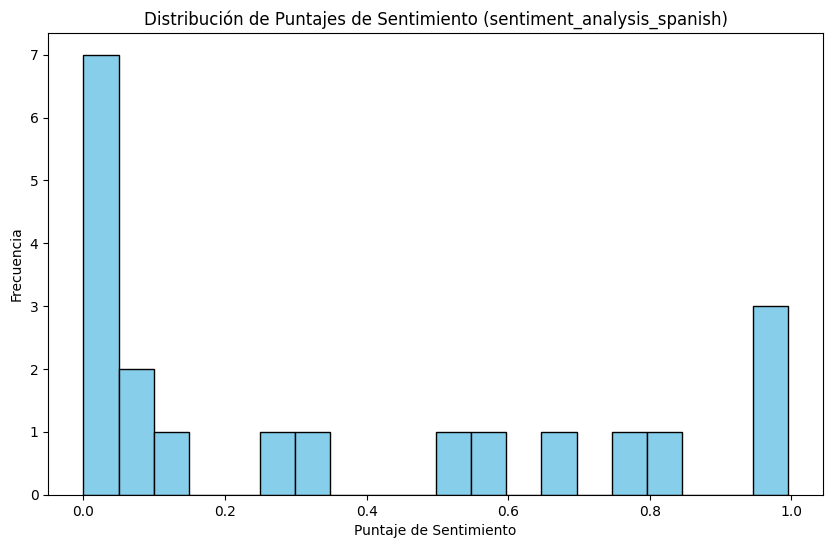

In [20]:
# Visualización: Histograma de puntajes de sentimiento
plt.figure(figsize=(10, 6))
plt.hist(df["sentimiento"], bins=20, color="skyblue", edgecolor="black")
plt.title("Distribución de Puntajes de Sentimiento (sentiment_analysis_spanish)")
plt.xlabel("Puntaje de Sentimiento")
plt.ylabel("Frecuencia")
plt.show()

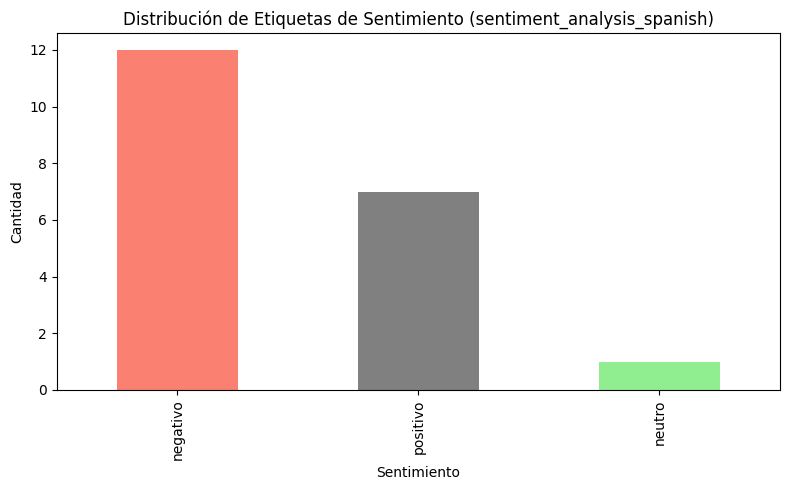

In [22]:
# Visualización: Distribución de etiquetas de sentimiento
plt.figure(figsize=(8, 5))
df["etiqueta_sentimiento"].value_counts().plot(kind="bar", color=["salmon", "grey", "lightgreen"])
plt.title("Distribución de Etiquetas de Sentimiento (sentiment_analysis_spanish)")
plt.xlabel("Sentimiento")
plt.ylabel("Cantidad")
plt.tight_layout()
plt.show()

NameError: name 'os' is not defined

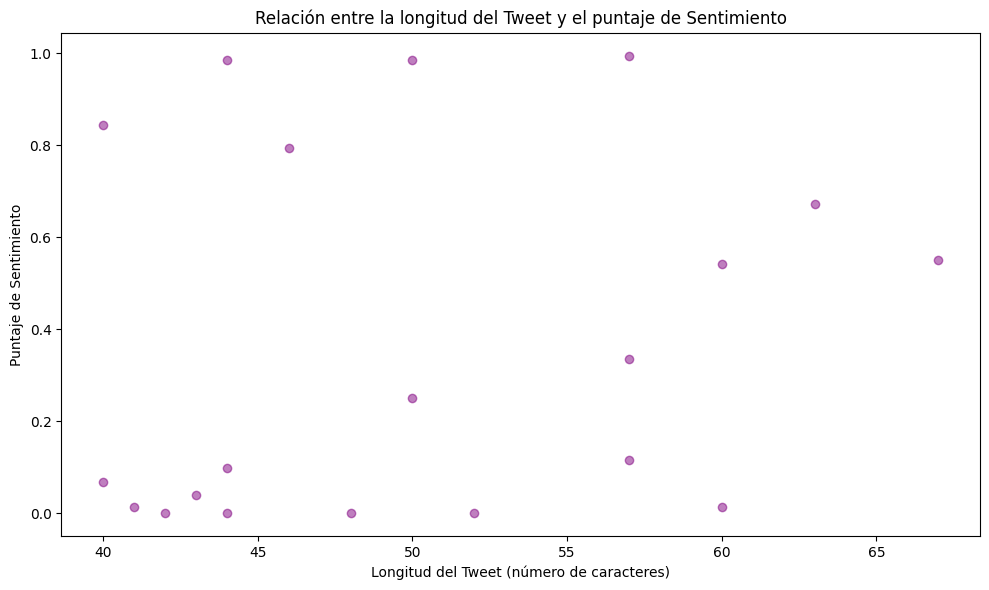

In [24]:
# 8. Visualización: Relación entre longitud del tweet y el puntaje de sentimiento
df['longitud'] = df['tweet_limpio'].apply(len)
plt.figure(figsize=(10, 6))
plt.scatter(df['longitud'], df['sentimiento'], alpha=0.5, color='purple')
plt.title('Relación entre la longitud del Tweet y el puntaje de Sentimiento')
plt.xlabel('Longitud del Tweet (número de caracteres)')
plt.ylabel('Puntaje de Sentimiento')
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'sentimiento_vs_longitud.png'))
plt.show()

In [28]:
from IPython.display import Markdown, display

conclusiones = """
### Conclusiones

1. **Importancia de la limpieza del texto:**  
   La eliminación de URLs, menciones, hashtags y otros elementos irrelevantes mejora la calidad del análisis, permitiendo que el analizador se concentre en el contenido real de cada tweet.

2. **Resultados del análisis de sentimientos:**  
   El uso de un analizador optimizado para español permite obtener puntajes que se traducen en clasificaciones (positivo, negativo, neutro). En el dataset analizado, se observa una mayor cantidad de tweets negativos, seguidos de positivos y muy pocos neutros.

3. **Distribución de los puntajes:**  
   El histograma muestra que la mayoría de los puntajes se concentran en rangos bajos, lo cual sugiere una tendencia general hacia una tonalidad negativa en los tweets.

4. **Relación entre longitud del tweet y sentimiento:**  
   La gráfica de dispersión entre la longitud del tweet y su puntaje de sentimiento ofrece una primera aproximación a la posible correlación. Aunque no se observa una relación muy marcada, en algunos casos los tweets más largos tienden a transmitir sentimientos más definidos, lo que invita a realizar análisis estadísticos adicionales (por ejemplo, correlación de Pearson o Spearman).

5. **Reflexiones y posibles mejoras:**  
   - Ajustar los umbrales de clasificación podría mejorar la detección de sentimientos positivos y negativos.  
   - Ampliar el dataset permitiría validar si la tendencia observada se mantiene en una muestra más representativa.  
   - Incorporar técnicas adicionales, como análisis de tópicos, podría complementar el análisis y ofrecer una visión más completa de los temas subyacentes.
"""

display(Markdown(conclusiones))


### Conclusiones

1. **Importancia de la limpieza del texto:**  
   La eliminación de URLs, menciones, hashtags y otros elementos irrelevantes mejora la calidad del análisis, permitiendo que el analizador se concentre en el contenido real de cada tweet.

2. **Resultados del análisis de sentimientos:**  
   El uso de un analizador optimizado para español permite obtener puntajes que se traducen en clasificaciones (positivo, negativo, neutro). En el dataset analizado, se observa una mayor cantidad de tweets negativos, seguidos de positivos y muy pocos neutros.

3. **Distribución de los puntajes:**  
   El histograma muestra que la mayoría de los puntajes se concentran en rangos bajos, lo cual sugiere una tendencia general hacia una tonalidad negativa en los tweets.

4. **Relación entre longitud del tweet y sentimiento:**  
   La gráfica de dispersión entre la longitud del tweet y su puntaje de sentimiento ofrece una primera aproximación a la posible correlación. Aunque no se observa una relación muy marcada, en algunos casos los tweets más largos tienden a transmitir sentimientos más definidos, lo que invita a realizar análisis estadísticos adicionales (por ejemplo, correlación de Pearson o Spearman).

5. **Reflexiones y posibles mejoras:**  
   - Ajustar los umbrales de clasificación podría mejorar la detección de sentimientos positivos y negativos.  
   - Ampliar el dataset permitiría validar si la tendencia observada se mantiene en una muestra más representativa.  
   - Incorporar técnicas adicionales, como análisis de tópicos, podría complementar el análisis y ofrecer una visión más completa de los temas subyacentes.
